In [7]:
import numpy as np
import matplotlib.pyplot as plt

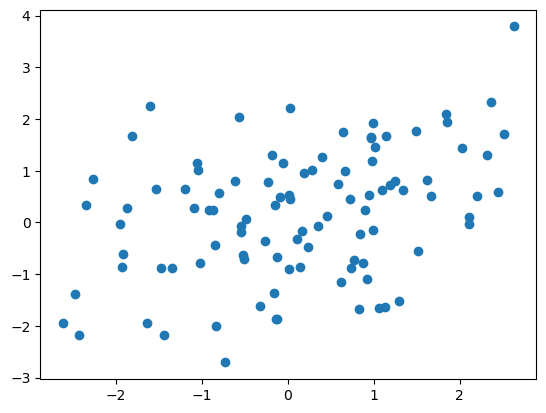

In [8]:
# Step 1: Generate 2-D Simulated Data
np.random.seed(42)
num_samples = 100
mean = [0, 0]
covariance = [[2, 1], [1, 2]]  # Covariance matrix
data = np.random.multivariate_normal(mean, covariance, size=num_samples)
plt.scatter(data[:, 0], data[:, 1])

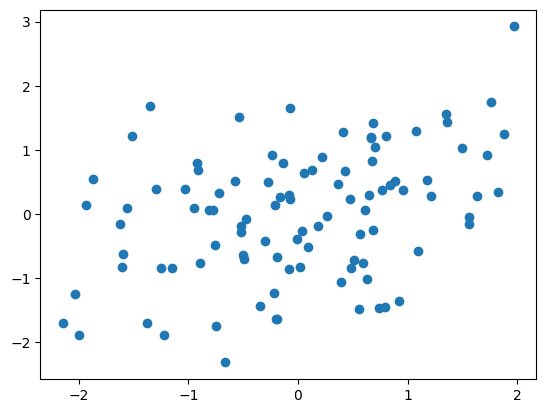

In [9]:
# Step 2: Standardize the Data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1])

In [10]:
# Step 3: Compute the Covariance Matrix
cov_matrix = np.cov(data_standardized, rowvar=False)
cov_matrix

array([[1.01010101, 0.37991321],
       [0.37991321, 1.01010101]])

In [13]:
# Step 4: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[0.6301878  1.39001422]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [21]:
# Step 5: Select Principal Components
# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(eigenvalues)
print(eigenvectors)
# Choose the number of principal components (k)
k = 1
principal_components = eigenvectors[:, :k]
print(f"Principle: {principal_components}, {principal_components.shape}")

[1.39001422 0.6301878 ]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Principle: [[0.70710678]
 [0.70710678]], (2, 1)


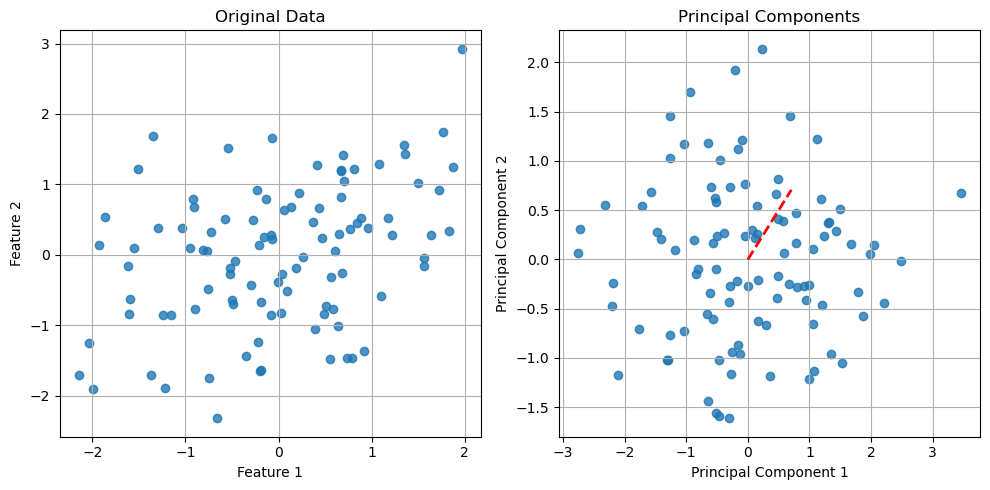

In [20]:
# Step 6: Project Data onto Principal Components
data_pca = np.dot(data_standardized, principal_components)

# Plot the original data and principal components
plt.figure(figsize=(10, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Plot principal components
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
plt.title('Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Plot line through centroid in the direction of first eigenvector
centroid = np.mean(data_standardized, axis=0)
plt.plot([centroid[0], centroid[0] + eigenvectors[0, 0]], 
         [centroid[1], centroid[1] + eigenvectors[1, 0]], 
         color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()